# Rezolvarea sistemelor liniare determinate. Factorizarea LU.



**Tema:** Rezolvarea numerica a *sistemelor liniare inferior si superior triunghiulare* prin metode de substitutie directa precum si rezolvarea sistemelor liniare determinate dense prin *factorizarea LU*.

## Factorizarea LU

În multe situaţii, se dovedeşte a fi convenabil de a exprima o matrice dată sub forma unui produs de două matrice triunghiulare.

**Definiția 1** Fie dată $A \in \mathbb{R}^{n \times n}$. Dacă există o matrice inferior triunghiulară $L \in \mathbb{R}^{n \times n}$ şi o matrice superior triunghiulară $U \in \mathbb{R}^{n \times n}$ astfel încât

$$
A=L U
$$

atunci expresia de mai sus se numeşte factorizare LU a matricei $A$.

**Definiţia 2** Dacă $A \in \mathbb{R}^{n \times n}$, atunci expresia

$$
A=L D U,
$$

unde $L \in \mathbb{R}^{n \times n}$ este inferior triunghiulară unitară, $U \in \mathbb{R}^{n \times n}$ este superior triunghiulară unitară şi $D \in \mathbb{R}^{n \times n}$ este o matrice diagonală, se numeşte factorizare $L D U$ a matricei $A$.

**Teorema.** O matrice $A \in \mathbb{R}^{n \times n}$ admite factorizare LDU unică dacă şi numai dacă toate submatricele lider principale $A^{[k]}, k=1: n-1$, sunt nesingulare.

Factorizările practice LU asociază matricea diagonală $D$ din factorizarea LDU:
- cu matricea $U$, definind aşa numita factorizare Doolittle $A=L U$, unde $L$ este inferior triunghiulară unitară şi $U$ este superior triunghiulară;
- sau cu matricea $L$, definind factorizarea Crout $A=L U$, unde $L$ este inferior triunghiulară şi $U$ superior triunghiulară unitară.

<font color="red">Din teorema rezultă că ambele factorizări, Doolittle şi Crout , există şi sunt unice dacă şi numai dacă **submatricele lider principale** $A^{[k]}, k=1: n-1$, sunt toate **nensingulare**.</font>

Întrucât algoritmul de <font color="green">triangularizare prin eliminare gaussiană fără pivotare calculează implicit şi factorizarea Doolittle</font>, mai jos va fi prezentat numai *algoritmul Crout* de factorizare LU.

## Rezolvarea sistemelor triunghiulare

**Factorizările LU** sunt utile în multe probleme de calcul, cum ar fi:
*   **rezolvarea sistemelor** liniare
*   calculul **inversei** unei matrice
*   calculul **determinantului** unei matrice


Presupunand că matricea dată $A \in \mathbb{R}^{n \times n}$ admite o factorizare LU (altfel se impune utilizarea strategiilor de pivotare) vom indica aici numai modalitatea de rezolvarea a sistemelor liniare $A x=b$. Celelalte probleme sunt tratate în secţiuni distincte.

Soluţia sistemului liniar $A x=b$ se poate calcula folosind următoarea schemă de calcul:


1.   Se calculeaza factorizarea LU: $A=LU \rightarrow $  Algorithmul Crout/Doolittle
2.   Se rezolva sistemul inferior triunghiular $Ly = b → $ Algoritmul LTRIS
3.   Se rezolva sistemul supeior triunghiular  $Ux = y \rightarrow $ Algoritmul UTRIS

## Algoritmi

__________________________________________________________________________

**Algoritm 1** (**CROUT-factorizarea Crout**) (Dată matricea $A \in \mathbb{R}^{n \times n} \mathrm{cu}$ toate submatricele lider principale $A^{[k]}, k=1: n-1$, nesingulare, acest algoritm calculează factorizarea Crout $A=L U$. Elementele matricelor $L$ şi $U$ suprascriu elementele corespondente ale lui $A$ (mai puţin elementele diagonale ale lui $U$, care sunt egale cu 1).)

$\left(0 . a_{i 1} \leftarrow l_{i 1}=a_{i 1}, \quad i=1: n\right)$
1. pentru $j=2: n$
    1. $a_{1 j} \leftarrow u_{1 j}=a_{1 j} / l_{11}$
2. pentru $k=2: n$
    1. pentru $i=k: n$
         1. $a_{i k} \leftarrow l_{i k}=a_{i k}-\sum_{l=1}^{k-1} l_{i l} u_{l k}$
    2. dacă $k=n$ atunci stop
    3. pentru $j=k+1: n$
          1. $a_{k j} \leftarrow u_{k j}=\left(a_{k j}-\sum_{l=1}^{k-1} l_{k l} u_{l j}\right) / l_{k k}$
__________________________________________________________________________

Pentru a evita necesitatea ca $A^{[k]}, k=1: n-1$, să fie nensingulare, se poate utiliza numai pivotarea liniilor care pot fi introduse după instrucţtiunea 2.1 a algoritmului de mai sus.

*Amintim algorimi pentru rezolvarea sistemelor triunghiulare:*
__________________________________________________________________________

**Algoritm 2 (UTRIS/S_SUP_TR)** (Dată o matrice $U \in \mathbb{R}^{n \times n}$, superior triunghiulară, nesingulară şi un vector $b \in \mathbb{R}^n$, acest algoritm calculează soluţia $x$ a sistemului $U x=b$.)
1. pentru $i=n:-1: 1$
1. $s \leftarrow b_i$
2. pentru $j=i+1: n$
1. $s \leftarrow s-u_{i j} x_j$
3. $x_i \leftarrow s / u_{i i}$
__________________________________________________________________________

**Algoritm 3 (LTRIS/ S_INF_TR)** (Dată o matrice $L \in \mathbb{R}^{n \times n}$, nesingulară, inferior triunghiulară şi un vector $b \in \mathbb{R}^n$, algoritmul calculează soluţia $x$ a sistemului $L x=b$.)
1. pentru $i=1: n$
    1. $s \leftarrow b_i$
2. pentru $j=1: i-1$
    1. $s \leftarrow s-l_{i j} x_j$
3. $x_i \leftarrow s / l_{i i}$



## Aplicatie: Gaseste sensul mesajului!

### Introducere

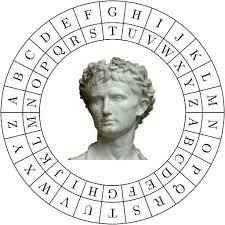
 Istoric, **criptografia** – știința codificării și decodificării informației – a fost folosită în principal în scopuri militare. Probabil îți amintești de mașina ENIGMA, folosită de germani în Al Doilea Război Mondial pentru a comunica în secret. Astăzi, criptarea a devenit esențială pentru *comunicarea electronică sigură*, cum ar fi tranzacțiile cu carduri de credit pe internet, confidențialitatea e-mailurilor etc.

Una dintre cele mai simple si raspandite criptari este *Cifrul lui Cezar*, denumit si *Deplasarea Cezariană*. Acesta presupune ca fiecare literă dintr-un text sa fie înlocuită cu o altă literă, aflată la un număr fix de poziții mai în față în alfabet.

> *De exemplu: Dacă folosim o deplasare de +3, atunci A devine D, B devine E, C devine F etc.*


**Terminologie:**

*   **Criptare:**  Procesul de transformare a datelor într-un format inaccesibil fără o **cheie secretă**.
*    **Decriptare:** Procesul de transformare a datelor criptate înapoi în forma lor originală, folosind o **cheie secretă**.
*    **Cheie:** Este o informație secretă (un șir de caractere, număr, sau cod) folosită pentru a cripta sau decripta un mesaj.
*   **Cifru:** Este un algoritm concret folosit pentru a transforma un mesaj clar într-un mesaj criptat (și invers, prin decriptare). Este parte dintr-un sistem criptografic, dar nu include neapărat tot ansamblul (ex: generarea cheilor).


---



### Ex. 2 (3p): Descifrati mesajul primit la laborator folosind cheia furnizata. Rezolvati sistemul utilizand algoritmul CROUT pentru factorizarea LU, UTRIS si LTRIS. Punctajul maxim se acorda pentru versiunele adaptate ale celor trei algoritmi ceruti.

In [13]:
import numpy as np

rng = np.random.default_rng(0) #generator

#------------ Input --------------------------------
#   !!!Aceasta sectiune nu se modifica!!!
n = 5;
A = np.diagflat(rng.integers(1,10, size=(n,1)), k=0)
A[:, n-1] = rng.integers(1,20, size=(1,n))
A[:, 0] = rng.integers(1,20, size=(1,n))
A = A.astype(float);
b = rng.integers(1,10, size=(n,1)).astype(float)
#-----------------------------------------------------
print(A)

sol = np.linalg.inv(np.copy(A))@np.copy(b)

[[13.  0.  0.  0.  1.]
 [18.  6.  0.  0.  2.]
 [10.  0.  5.  0.  1.]
 [12.  0.  0.  3.  4.]
 [19.  0.  0.  0. 16.]]


In [ ]:
def Crout(A):
  n = len(A)
  U = np.eye(n)
  L = np.zeros((n, n))

  # 0. L[i, 0] = A[i, 0], i = 0, n-1
  L[:, 0] = A[:, 0]

  # 1. pentru j = 1, n-1
  #   1. U[0, j] = A[0, j] / L[0, 0]
  U[0, n - 1] = A[0, n - 1] / L[0, 0]

  # 2. pentru k = 1, n-1
  #   1. pentru i = k, n-1
  #      1. L[i, k] = A[i, k] - sum(L[i, l] * U[l, k] for l in range(0, k))
  #   2. daca k = n-1, stop
  #   3. pentru j = k+1, n-1
  #      1. U[k, j] = (A[k, j] - sum(L[k, l] * U[l, j] for l in range(0, k))) / L[k, k]
  for k in range(1, n):
    if k < n - 1:
      # suma este 0 deoarece U are doar elemente nenule pe diagonala si pe ultima coloana
      L[k, k] = A[k, k]
    else:
      L[k, k] = A[k, k] - L[k, 0] * U[0, k]

    if k == n - 1:
      break

    U[k, n - 1] = (A[k, n - 1] - L[k, 0] * U[0, n - 1]) / L[k, k]

  return L, U

In [15]:
[L, U] = Crout(np.copy(A))
print("L is:")
print(L)
print("U is:")
print(U)
print("LU is:")
print(L @ U)
print("A is:")
print(A)

L is:
[[13.          0.          0.          0.          0.        ]
 [18.          6.          0.          0.          0.        ]
 [10.          0.          5.          0.          0.        ]
 [12.          0.          0.          3.          0.        ]
 [19.          0.          0.          0.         14.53846154]]
U is:
[[1.         0.         0.         0.         0.07692308]
 [0.         1.         0.         0.         0.1025641 ]
 [0.         0.         1.         0.         0.04615385]
 [0.         0.         0.         1.         1.02564103]
 [0.         0.         0.         0.         1.        ]]
LU is:
[[13.  0.  0.  0.  1.]
 [18.  6.  0.  0.  2.]
 [10.  0.  5.  0.  1.]
 [12.  0.  0.  3.  4.]
 [19.  0.  0.  0. 16.]]
A is:
[[13.  0.  0.  0.  1.]
 [18.  6.  0.  0.  2.]
 [10.  0.  5.  0.  1.]
 [12.  0.  0.  3.  4.]
 [19.  0.  0.  0. 16.]]


In [ ]:
def LTRIS(L,b):
  # L are doar prima coloana si diagonala nenule
  n = len(L)
  y = np.zeros((n,1))

  # pentru i = 0, n-1
  #   s = b[i]
  #   pentru j = 0, i-1
  #     s = s - L[i, j] * y[j]
  #   y[i] = s / L[i, i]

  for i in range(n):
    s = b[i]

    if i > 0:
      s = s - L[i, 0] * y[0]

    y[i] = s / L[i, i]

  return y

def UTRIS(U,y):
  # U are doar ultima coloana si diagonala nenule
  n = len(U)
  x = np.copy(y)

  # pentru i = n-1, 0
  #   s = x[i]
  #   pentru j = i+1, n-1   
  #     s = s - U[i, j] * x[j]
  #   x[i] = s / U[i, i]

  for i in range(n-1, -1, -1):
    s = x[i]

    if i < n - 1:
      s = s - U[i, n - 1] * x[n - 1]

    x[i] = s

  return x

In [17]:
y = LTRIS(L,b)
print("y is:")
print(y)
print("y with numpy is:")
print(np.linalg.solve(L, b))

x = UTRIS(U,y)
print("x is:")
print(x)
print("x with numpy is:")
print(sol)

y is:
[[ 0.53846154]
 [-0.61538462]
 [-0.07692308]
 [-0.15384615]
 [-0.08465608]]
y with numpy is:
[[ 0.53846154]
 [-0.61538462]
 [-0.07692308]
 [-0.15384615]
 [-0.08465608]]
x is:
[[ 0.54497354]
 [-0.60670194]
 [-0.07301587]
 [-0.0670194 ]
 [-0.08465608]]
x with numpy is:
[[ 0.54497354]
 [-0.60670194]
 [-0.07301587]
 [-0.0670194 ]
 [-0.08465608]]


### Bonus: Utilizați funcțiile de conversie puse la dispoziție de limbajul Python (de exemplu, `int()`, `chr()`, etc.) pentru a transpune valorile obținute în cadrul exercițiului anterior în caractere corespunzătoare.

factorizare
